# Adaptation Measures

Adaptation measures are defined by parameters that alter the exposures, hazard or impact functions. Risk transfer options are also considered. Single measures are defined in the `Measure` class, which can be aggregated to a `MeasureSet`.

# Measure class

A measure is characterized by the following attributes:

Related to measure's description:
 * name (str): name of the action
 * haz_type (str): related hazard type (peril), e.g. TC
 * color_rgb (np.array): integer array of size 3. Gives color code of this measure in RGB
 * cost (float): discounted cost (in same units as assets)
 
Related to a measure's impact:
 * hazard_set (str): file name of hazard to use
 * hazard_freq_cutoff (float): hazard frequency cutoff
 * exposure_set (str): file name of exposure to use
 * exp_region_id (int): region id of the selected exposures to consider
 * hazard_inten_imp (tuple): parameter a and b of hazard intensity change
 * mdd_impact (tuple): parameter a and b of the impact over the mean damage degree
 * paa_impact (tuple): parameter a and b of the impact over the percentage of affected assets
 * imp_fun_map (str): change of impact function id, e.g. '1to3'
 * risk_transf_attach (float): risk transfer attachment
 * risk_transf_cover (float): risk transfer cover
 
The method `check()` validates the attibutes and the method `apply()` applies a measures to the given exposure, impact functions and hazard. The last method is called from the `CostBenefit` class.
 
 Currently, only the impact of parameters `hazard_inten_imp`, `mdd_impact` and `paa_impact` is implemented (besides the description parameters). They transform the impact functions linearly: 
 
     intensity = intensity*hazard_inten_imp[0] + hazard_inten_imp[1]
     mdd = mdd*mdd_impact[0] + mdd_impact[1]
     paa = paa*paa_impact[0] + paa_impact[1]

2019-01-29 09:36:31,941 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Text(0.5,1,'TC: Modified impact function')

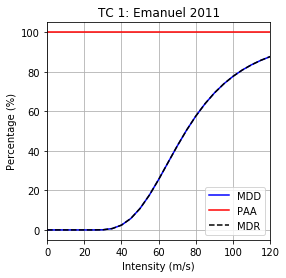

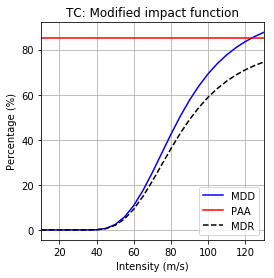

In [1]:
%matplotlib inline
import numpy as np
from climada.entity import Measure, ImpactFuncSet, IFTropCyclone, Exposures
from climada.hazard import Hazard

# define measure
meas = Measure()
meas.name = 'Mangrove'
meas.haz_type = 'TC'
meas.color_rgb = np.array([1, 1, 1])
meas.cost = 500000000
meas.mdd_impact = (1, 0)
meas.paa_impact = (1, -0.15)
meas.hazard_inten_imp = (1, -10) # reduces intensity by 10

# impact functions
if_tc = IFTropCyclone()
if_tc.set_emanuel_usa()
if_all = ImpactFuncSet()
if_all.add_func(if_tc)
if_all.plot()

# dummy Hazard and Exposures
haz = Hazard()
exp = Exposures()

# new impact functions
new_exp, new_ifs, new_haz = meas.apply(exp, if_all, haz)
fig, axes = new_ifs.plot()
axes[0].set_title('TC: Modified impact function')

# MeasureSet class

Similarly to the `ImpactFuncSet`, `MeasureSet` is a container which handles `Measure` instances through the methods `add_measure()`, `remove_measure()`and `get_measure()`. Use the `check()` method to make sure all the measures have been propoerly set. 

`MeasureSet` contains the attribute `tag` of type `Tag`, which stores information about the data: the original file name and a description.

In [2]:
from climada.entity import MeasureSet
help(MeasureSet)

Help on class MeasureSet in module climada.entity.measures.measure_set:

class MeasureSet(builtins.object)
 |  Contains measures of type Measure. Loads from
 |  files with format defined in FILE_EXT.
 |  
 |  Attributes:
 |      tag (Tag): information about the source data
 |      _data (dict): cotains Measure classes. It's not suppossed to be
 |          directly accessed. Use the class methods instead.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Empty initialization.
 |      
 |      Examples:
 |          Fill MeasureSet with values and check consistency data:
 |      
 |          >>> act_1 = Measure()
 |          >>> act_1.name = 'Seawall'
 |          >>> act_1.color_rgb = np.array([0.1529, 0.2510, 0.5451])
 |          >>> act_1.hazard_intensity = (1, 0)
 |          >>> act_1.mdd_impact = (1, 0)
 |          >>> act_1.paa_impact = (1, 0)
 |          >>> meas = MeasureSet()
 |          >>> meas.add_Measure(act_1)
 |          >>> meas.tag.description = "my dummy Meas

In [3]:
# build measures
import numpy as np
import matplotlib.pyplot as plt
from climada.entity import Measure, MeasureSet

meas_1 = Measure()
meas_1.name = 'Mangrove'
meas_1.color_rgb = np.array([1, 1, 1])
meas_1.cost = 500000000
meas_1.mdd_impact = (1, 2)
meas_1.paa_impact = (1, 2)
meas_1.hazard_inten_imp = (1, 2)
meas_1.risk_transf_cover = 500

meas_2 = Measure()
meas_2.name = 'Sandbags'
meas_2.color_rgb = np.array([1, 1, 1])
meas_2.cost = 22000000
meas_2.mdd_impact = (1, 2)
meas_2.paa_impact = (1, 3)
meas_2.hazard_inten_imp = (1, 2)
meas_2.exp_region_id = 2

# gather all measures
meas_set = MeasureSet()
meas_set.add_measure(meas_1)
meas_set.add_measure(meas_2)
meas_set.check()

# select one measure
meas_sel = meas_set.get_measure('Sandbags')
print(meas_sel.name, meas_sel.cost)

Sandbags 22000000


## Read measures of an Excel file

Measures defined in an excel file following the template provided in sheet `measures` of `climada_python/data/system/entity_template.xlsx` can be ingested directly using the method `read_excel()`.

In [4]:
from climada.entity import MeasureSet
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
meas_set = MeasureSet()
meas_set.read_excel(file_name)
print('Read file:', meas_set.tag.file_name)

Read file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx


## Write measures

Measures can be writen in Excel format using `write_excel()` method.

In [5]:
from climada.entity import MeasureSet
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
meas_set = MeasureSet()
meas_set.read_excel(file_name)

# write file
meas_set.write_excel('results/tutorial_meas_set.xlsx')

Pickle can always be used as well:

In [6]:
from climada.util.save import save
# this generates a results folder in the current path and stores the output there
save('tutorial_meas_set.p', meas_set)

2019-01-29 09:36:34,075 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/script/tutorial/results/tutorial_meas_set.p
